<a href="https://colab.research.google.com/github/rsadaphule/jhu-cv/blob/main/V2_JHU_CV_Homwork4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 - AutoEncoders

## This code does the following:

* Loads and preprocesses the MNIST dataset.
* Defines a 3-layer perceptron autoencoder.
* Trains the autoencoder with a specified number of hidden units.
* Plots the learning curves for both training and validation loss.
* Visualizes the weights of the hidden units as 28x28 images.




In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, datasets
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

In [5]:
# Load MNIST dataset
# Load and preprocess the MNIST dataset

# Load and preprocess the MNIST dataset
(x_train, y_train), (original_x_test, original_y_test) = mnist.load_data()
x_data = x_train.astype('float32') / 255.
x_data = x_data.reshape((len(x_data), np.prod(x_data.shape[1:])))

# Calculate split indices
total_samples = x_data.shape[0]
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size  # Ensures all data is used

# Split the data
x_train = x_data[:train_size]
x_val = x_data[train_size:train_size+val_size]
x_test = x_data[train_size+val_size:]


In [6]:
# Define the autoencoder model
def build_autoencoder(hidden_units):
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(hidden_units, activation='relu')(input_img)
    decoded = layers.Dense(784, activation='sigmoid')(encoded)
    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
    return autoencoder

In [7]:
hidden_units = 10 # Example for 10 hidden units, repeat for other sizes
autoencoder = build_autoencoder(hidden_units)


In [8]:
# Train the autoencoder
history_unit_10 = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val, x_val))


# Train the autoencoder
history_unit_10 = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val, x_val))

# Save the trained autoencoder model to a file
model_save_path = 'autoencoder_model_unit_10.h5'  # Specify the path where you want to save the model
autoencoder.save(model_save_path)
print(f"Model saved to {model_save_path}")

Epoch 1/50
165/165 [==============================] - 3s 5ms/step - loss: 0.0993 - val_loss: 0.0645
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0577 - val_loss: 0.0514
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0471 - val_loss: 0.0437
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0415 - val_loss: 0.0401
Epoch 5/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0385 - val_loss: 0.0377
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0366 - val_loss: 0.0364
Epoch 7/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0355 - val_loss: 0.0355
Epoch 8/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0349 - val_loss: 0.0350
Epoch 9/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0343 - val_loss: 0.0345
Epoch 10/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0339 - val_loss: 0.0341

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
hidden_units = 5 # Example for 5 hidden units, repeat for other sizes
autoencoder = build_autoencoder(hidden_units)
history_unit_5 = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val, x_val))
# Save the trained autoencoder model to a file
model_save_path = 'autoencoder_model_unit_5.h5'  # Specify the path where you want to save the model
autoencoder.save(model_save_path)
print(f"Model saved to {model_save_path}")

Epoch 1/50
165/165 [==============================] - 2s 4ms/step - loss: 0.1121 - val_loss: 0.0687
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0644 - val_loss: 0.0606
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0574 - val_loss: 0.0544
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0526 - val_loss: 0.0512
Epoch 5/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0501 - val_loss: 0.0495
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0489 - val_loss: 0.0486
Epoch 7/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0481 - val_loss: 0.0480
Epoch 8/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0475 - val_loss: 0.0475
Epoch 9/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0471 - val_loss: 0.0470
Epoch 10/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0466 - val_loss: 0.0467

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
hidden_units = 20 # Example for 60 hidden units, repeat for other sizes
autoencoder = build_autoencoder(hidden_units)
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val, x_val))

# Save the trained autoencoder model to a file
model_save_path = 'autoencoder_model_unit_20.h5'  # Specify the path where you want to save the model
autoencoder.save(model_save_path)
print(f"Model saved to {model_save_path}")

Epoch 1/50
165/165 [==============================] - 2s 5ms/step - loss: 0.0891 - val_loss: 0.0573
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0482 - val_loss: 0.0419
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0382 - val_loss: 0.0353
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0329 - val_loss: 0.0312
Epoch 5/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0294 - val_loss: 0.0282
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0268 - val_loss: 0.0260
Epoch 7/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0249 - val_loss: 0.0245
Epoch 8/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0235 - val_loss: 0.0233
Epoch 9/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0225 - val_loss: 0.0224
Epoch 10/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0217 - val_loss: 0.0217

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
hidden_units = 30 # Example for 30 hidden units, repeat for other sizes
autoencoder = build_autoencoder(hidden_units)
history_unit_30 = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val, x_val))
# Save the trained autoencoder model to a file
model_save_path = 'autoencoder_model_unit_30.h5'  # Specify the path where you want to save the model
autoencoder.save(model_save_path)
print(f"Model saved to {model_save_path}")

Epoch 1/50
165/165 [==============================] - 2s 4ms/step - loss: 0.0828 - val_loss: 0.0498
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0427 - val_loss: 0.0377
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0340 - val_loss: 0.0311
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0284 - val_loss: 0.0265
Epoch 5/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0242 - val_loss: 0.0225
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0210 - val_loss: 0.0201
Epoch 7/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0189 - val_loss: 0.0183
Epoch 8/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.0169
Epoch 9/50
165/165 [==============================] - 1s 4ms/step - loss: 0.0160 - val_loss: 0.0158
Epoch 10/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0149 - val_loss: 0.0148

In [12]:
hidden_units = 60 # Example for 60 hidden units, repeat for other sizes
autoencoder = build_autoencoder(hidden_units)
history_unit_60 = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val, x_val))

# Save the trained autoencoder model to a file
model_save_path = 'autoencoder_model_unit_60.h5'  # Specify the path where you want to save the model
autoencoder.save(model_save_path)
print(f"Model saved to {model_save_path}")

Epoch 1/50
165/165 [==============================] - 2s 4ms/step - loss: 0.0702 - val_loss: 0.0398
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0330 - val_loss: 0.0279
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0244 - val_loss: 0.0215
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0192 - val_loss: 0.0173
Epoch 5/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0156 - val_loss: 0.0143
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0129 - val_loss: 0.0121
Epoch 7/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 8/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 9/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 10/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0075 - val_loss: 0.0074

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
hidden_units = 120 # Example for 60 hidden units, repeat for other sizes
autoencoder = build_autoencoder(hidden_units)
history_unit_120 = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val, x_val))

# Save the trained autoencoder model to a file
model_save_path = 'autoencoder_model_unit_120.h5'  # Specify the path where you want to save the model
autoencoder.save(model_save_path)
print(f"Model saved to {model_save_path}")

Epoch 1/50
165/165 [==============================] - 2s 4ms/step - loss: 0.0607 - val_loss: 0.0317
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0247 - val_loss: 0.0196
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0163 - val_loss: 0.0140
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0119 - val_loss: 0.0105
Epoch 5/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0091 - val_loss: 0.0083
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 7/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 8/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 9/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 10/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0043

****** Learning curver for model with hidden units 5 *******


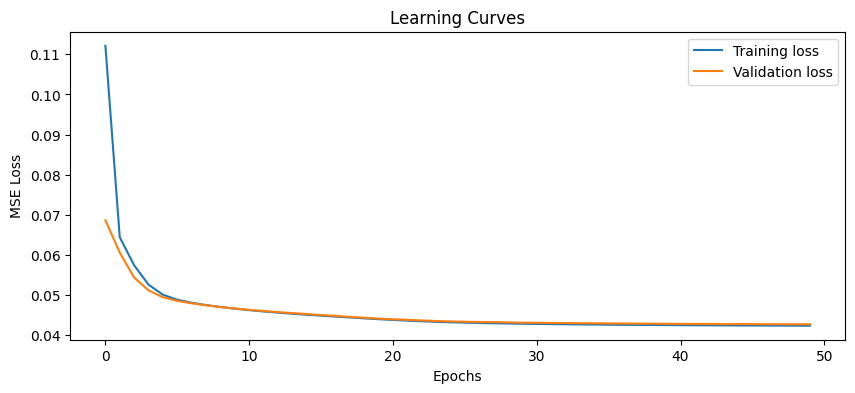

282/282 - 0s - loss: 0.0422 - 479ms/epoch - 2ms/step
Test Loss: 0.04216042160987854
****** Learning curver for model with hidden units 10 *******


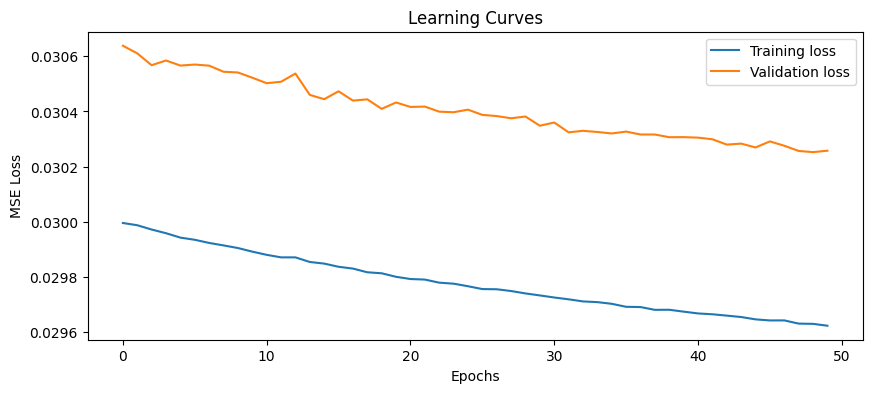

282/282 - 0s - loss: 0.0297 - 461ms/epoch - 2ms/step
Test Loss: 0.029718637466430664
****** Learning curver for model with hidden units 30 *******


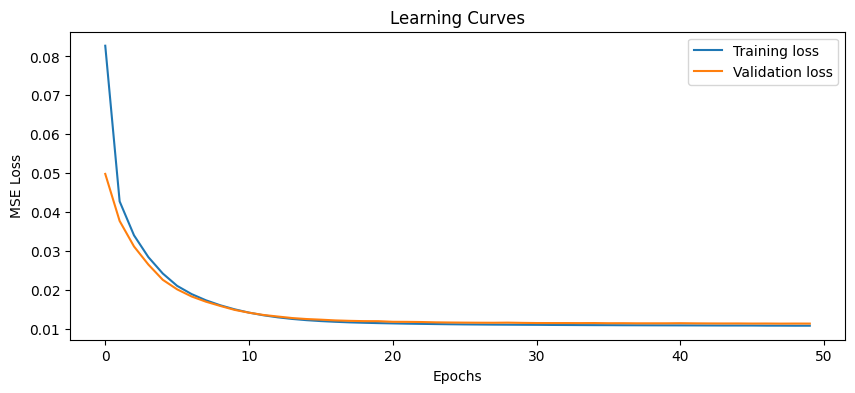

282/282 - 0s - loss: 0.0109 - 468ms/epoch - 2ms/step
Test Loss: 0.010941903106868267
****** Learning curver for model with hidden units 60 *******


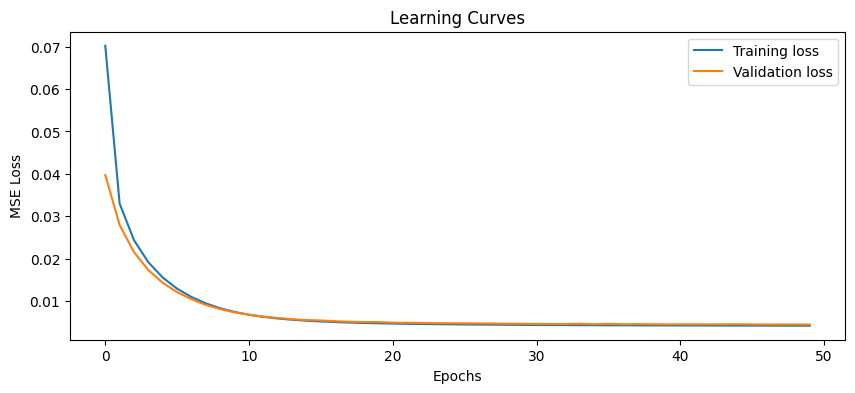

282/282 - 0s - loss: 0.0044 - 476ms/epoch - 2ms/step
Test Loss: 0.0043835993856191635
****** Learning curver for model with hidden units 120 *******


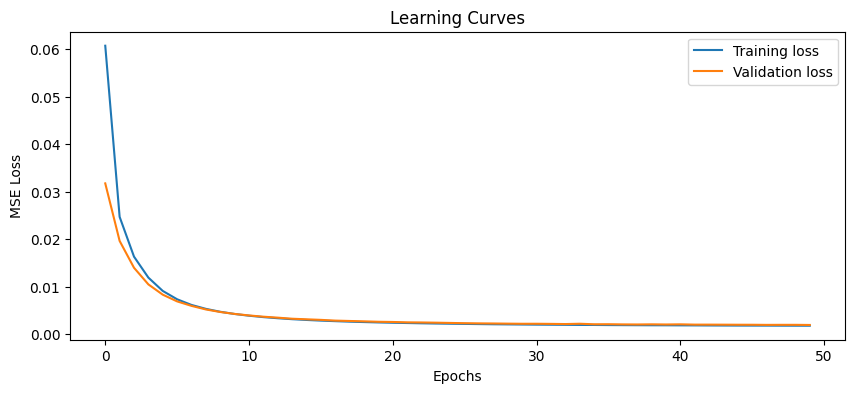

282/282 - 0s - loss: 0.0019 - 456ms/epoch - 2ms/step
Test Loss: 0.0018869787454605103


In [15]:
from tensorflow.keras.models import load_model
# Plot learning curves
hidden_units=["5", "10", "30", "60", "120"]
#hidden_units = ["10"]
models = ["autoencoder_model_unit_5.h5", "autoencoder_model_unit_10.h5", "autoencoder_model_unit_30.h5", "autoencoder_model_unit_60.h5", "autoencoder_model_unit_120.h5"]
#models = [  "autoencoder_model_unit_10.h5" ]
histories = [history_unit_5, history_unit_10, history_unit_30, history_unit_60, history_unit_120]
# Load the autoencoder model from the file
counter=0
for model_path in models:
  model = load_model(model_path)
  print(f"****** Learning curver for model with hidden units {hidden_units[counter]} *******")
  # Plot learning curves
  plt.figure(figsize=(10, 4))
  plt.plot(histories[counter].history['loss'], label='Training loss')
  plt.plot(histories[counter].history['val_loss'], label='Validation loss')
  plt.title('Learning Curves')
  plt.xlabel('Epochs')
  plt.ylabel('MSE Loss')
  plt.legend()
  plt.show()
  counter=counter+1
  # Optionally, evaluate the model on the new test set to see how it performs
  test_loss = model.evaluate(x_test, x_test, verbose=2)
  print(f'Test Loss: {test_loss}')

Summary of loss vs Hidden unit size
```
Hiddent Unit Size.    | Validation loss | Test Loss
----------------------|----------------------------
5                     | 0.0418.         | 0.0421
10                    | 0.0293          | 0.0297
30                    | 0.01015.        | 0.01094
60                    | 0.0040          | 0.00438
120                   | 0.0017          | 0.00189
```
As you can see the model with 120 unit hindden size offers lowest loss and hence highest performance


In [58]:
# Filter out images of digit '7'
test_images = x_test
test_images = test_images[0:1]
# Check the shape before reshaping
print("Original shape:", test_images.shape)
#test_images = test_images.reshape(test_images.shape[0], -1)

Original shape: (1, 784)


In [59]:
def display_image(input_image, output_image):
  plt.figure(figsize=(6, 3))
  plt.subplot(1, 2, 1)
  plt.imshow(input_image.squeeze(), cmap='gray')
  plt.title('Original Image')
  plt.axis('off')
# Reconstructed image
  plt.subplot(1, 2, 2)
  plt.imshow(output_image.squeeze().reshape(28, 28), cmap='gray')
  plt.title('Reconstructed Image')
  plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 73ms/step
******** Displaying stats for model with hidden units 5 ********
Hidden Units : autoencoder_model_unit_5.h5,  MSE for the model: 0.035008504986763


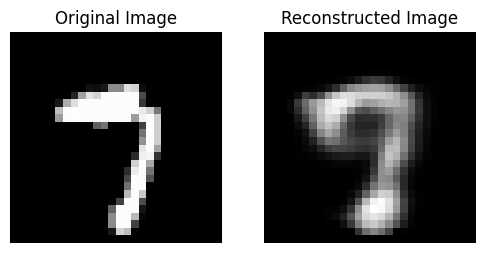

1/1 [==============================] - 0s 52ms/step
******** Displaying stats for model with hidden units 10 ********
Hidden Units : autoencoder_model_unit_10.h5,  MSE for the model: 0.02153775654733181


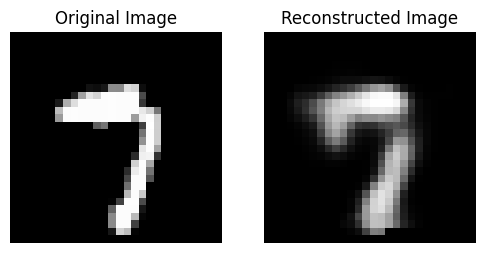

1/1 [==============================] - 0s 48ms/step
******** Displaying stats for model with hidden units 30 ********
Hidden Units : autoencoder_model_unit_30.h5,  MSE for the model: 0.006848359480500221


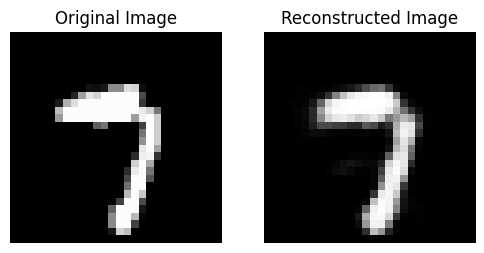

1/1 [==============================] - 0s 48ms/step
******** Displaying stats for model with hidden units 60 ********
Hidden Units : autoencoder_model_unit_60.h5,  MSE for the model: 0.0023682918399572372


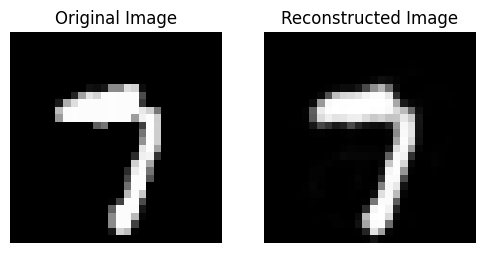

1/1 [==============================] - 0s 50ms/step
******** Displaying stats for model with hidden units 120 ********
Hidden Units : autoencoder_model_unit_120.h5,  MSE for the model: 0.0006637893966399133


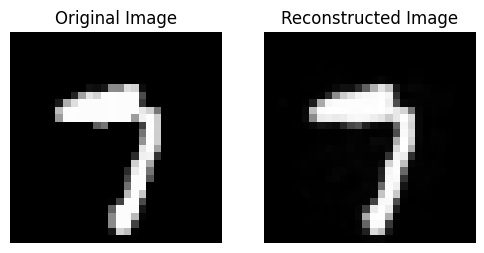

In [60]:
from tensorflow.keras import models, layers, losses, datasets
from tensorflow.keras.models import load_model

hidden_units=["5", "10", "30", "60", "120"]
#hidden_units = ["10"]
models = ["autoencoder_model_unit_5.h5", "autoencoder_model_unit_10.h5", "autoencoder_model_unit_30.h5", "autoencoder_model_unit_60.h5", "autoencoder_model_unit_120.h5"]
#models = [  "autoencoder_model_unit_10.h5" ]

# Load the autoencoder model from the file
counter=0
for model_path in models:
  model = load_model(model_path)
  # Use the model to reconstruct the images of digit '3'
  reconstructed_images = model.predict(test_images)
  # Calculate the Mean Squared Error (MSE) between original and reconstructed images
  mse = np.mean(np.square(test_images - reconstructed_images))
  print(f"******** Displaying stats for model with hidden units {hidden_units[counter]} ********")
  print(f"Hidden Units : {model_path},  MSE for the model: {mse}")
  display_image(test_images[0].reshape(1, 28, 28), reconstructed_images[0])
  counter = counter + 1

#Conclusion
## Autoencoder with 120 units performs best. The quality of recostructed images looks a lot better with hidden units = 120 and also validation loss is lowest.

## As number of hidden units increases, the loss improves and reconstruction quality improves as well


******** Displaying weights for model with hidden units 10 ********


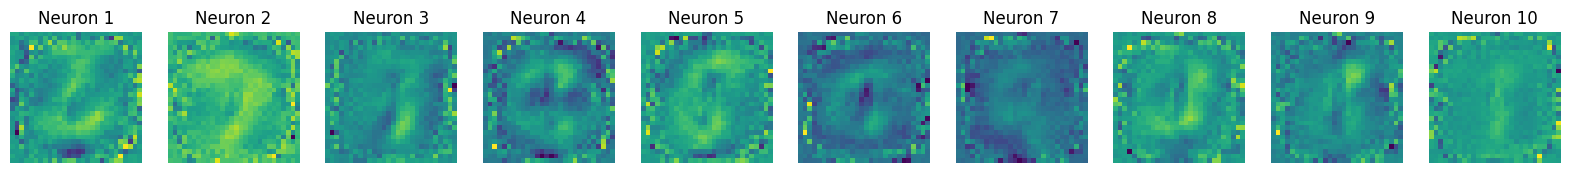

******** Displaying weights for model with hidden units 20 ********


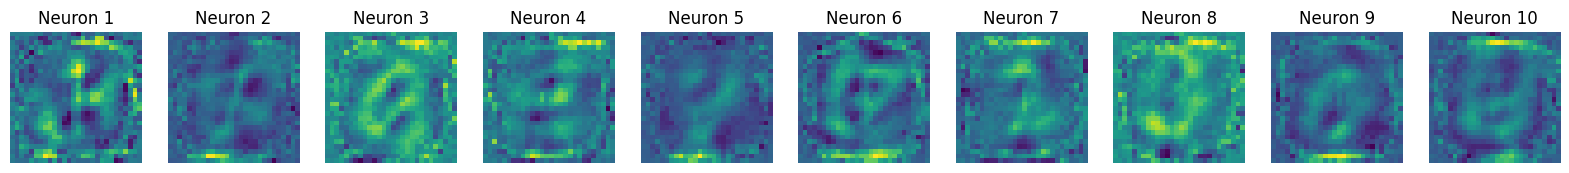

In [61]:
# Visualize the weights for 10 and 20 hidden units
hidden_units=[10, 20]
#hidden_units = ["10"]
models = ["autoencoder_model_unit_10.h5", "autoencoder_model_unit_20.h5"]
#models = [  "autoencoder_model_unit_10.h5" ]
counter=0
for model_path in models:
  model = load_model(model_path)
  weights = model.layers[1].get_weights()[0]  # Get weights of the encoded layer
  n = min(10, hidden_units[counter])  # Display this many digits
  print(f"******** Displaying weights for model with hidden units {hidden_units[counter]} ********")
  # Plot the weights
  plt.figure(figsize=(20, 4))
  for i in range(n):
      ax = plt.subplot(1, n, i + 1)
      plt.imshow(weights[:, i].reshape(28, 28), cmap='viridis')
      plt.title(f'Neuron {i + 1}')
      plt.axis('off')
  plt.show()
  counter = counter + 1